<a href="https://colab.research.google.com/github/yupingjiang5/algorithmic-trading-python/blob/master/Optimize_portfolio_Using_efficient_Frontier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description: This program attempts to optimize a our portfolio using the Efficient Frontier

In [ ]:
#pip install numpy

In [ ]:
#pip install yfinance

In [ ]:
#pip install datetime

In [ ]:
#pip install pandas

In [ ]:
#pip install pandas_datareader

In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from pandas_datareader import data as web

In [ ]:
import yfinance as yf
plt.style.use('fivethirtyeight')
yf.pdr_override() 

In [ ]:
# Get the stock symbles/tickers in the portfolios
assets = ['TSLA', 'BIDU', 'BWA','LUV','BA','FB','CAT','UBER','QCOM','NVDA','AMZN']

In [ ]:
#Assign weights to the stocks. Assign equal weights to each stock at first.
weights= np.array([1/11,1/11,1/11,1/11,1/11,1/11,1/11,1/11,1/11,1/11,1/11])

In [ ]:
# Get the stock/portfolio starting date
stockStartDate= '2013-01-01'

In [ ]:
# Get the stocks ending date (today)
today = datetime.today().strftime("%Y-%m-%d")

In [ ]:
# Create a datefrime to store the adj close price of the stocks 
df =pd.DataFrame()

In [ ]:
# Store the adj close price of the stock into the df
for stock in assets:
    df[stock] = web.get_data_yahoo(stock, stockStartDate, today)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
# Show the dataframe
df

,TSLA,BIDU,BWA,LUV,BA,FB,CAT,UBER,QCOM,NVDA,AMZN
Date,,,,,,,,,,,
2013-01-02,7.072000,104.120003,33.047218,9.779121,64.583862,28.000000,72.530685,NaN,49.740509,2.940028,257.309998
2013-01-03,6.954000,104.980003,32.994003,10.012629,64.919052,27.770000,73.228821,NaN,49.510052,2.942339,258.480011
2013-01-04,6.880000,104.650002,32.727879,10.162071,65.103401,28.760000,73.632210,NaN,48.780270,3.039415,259.149994
2013-01-07,6.868000,102.290001,32.594818,10.190090,63.796154,29.420000,73.857178,NaN,49.172054,2.951585,268.459991
2013-01-08,6.736000,101.089996,32.151283,10.302173,62.120190,29.059999,72.918541,NaN,49.095230,2.886867,266.380005
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-02,1084.599976,148.960007,44.270000,45.340000,202.380005,310.390015,196.789993,38.119999,177.029999,321.260010,3437.360107
2021-12-03,1014.969971,137.389999,43.880001,44.279999,198.490005,306.839996,197.800003,35.849998,176.509995,306.929993,3389.790039
2021-12-06,1009.010010,147.649994,44.790001,45.560001,205.880005,317.869995,201.279999,38.490002,175.449997,300.369995,3427.370117


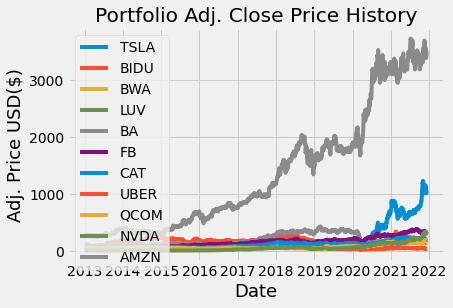

In [ ]:
# Visually show the stock / portfolio
title = 'Portfolio Adj. Close Price History'

# Get the stocks
my_stocks = df

# Create and plot the graph
for c in my_stocks.columns.values:
    plt.plot(my_stocks[c], label = c)
    
plt.title(title)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Adj. Price USD($)', fontsize=18)
plt.legend(my_stocks.columns.values, loc='upper left')

In [ ]:
# Show the daily simple return
returns = df.pct_change()
returns

,TSLA,BIDU,BWA,LUV,BA,FB,CAT,UBER,QCOM,NVDA,AMZN
Date,,,,,,,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.016686,0.008260,-0.001610,0.023878,0.005190,-0.008214,0.009625,NaN,-0.004633,0.000786,0.004547
2013-01-04,-0.010641,-0.003143,-0.008066,0.014925,0.002840,0.035650,0.005509,NaN,-0.014740,0.032993,0.002592
2013-01-07,-0.001744,-0.022551,-0.004066,0.002757,-0.020080,0.022949,0.003055,NaN,0.008032,-0.028897,0.035925
2013-01-08,-0.019220,-0.011731,-0.013608,0.010999,-0.026271,-0.012237,-0.012709,NaN,-0.001562,-0.021927,-0.007748
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-02,-0.009498,0.000874,0.033380,0.065570,0.075403,-0.000676,0.027785,0.058301,0.007971,0.021982,-0.001847
2021-12-03,-0.064199,-0.077672,-0.008810,-0.023379,-0.019221,-0.011437,0.005132,-0.059549,-0.002937,-0.044606,-0.013839
2021-12-06,-0.005872,0.074678,0.020738,0.028907,0.037231,0.035947,0.017594,0.073640,-0.006005,-0.021373,0.011086


In [ ]:
# Create and show the annualized covariance matrix
cov_matrix_annual = returns.cov() * 252 #### 252 is the number of trading days for this year
cov_matrix_annual

,TSLA,BIDU,BWA,LUV,BA,FB,CAT,UBER,QCOM,NVDA,AMZN
TSLA,0.312880,0.065854,0.047523,0.033625,0.052828,0.057087,0.030487,0.157898,0.048047,0.075240,0.054972
BIDU,0.065854,0.155042,0.041880,0.033476,0.043342,0.048360,0.035411,0.105505,0.040229,0.054897,0.040174
BWA,0.047523,0.041880,0.104389,0.046268,0.059405,0.031936,0.049054,0.099534,0.038242,0.044746,0.026756
LUV,0.033625,0.033476,0.046268,0.112189,0.070581,0.027495,0.038606,0.082028,0.030818,0.034394,0.021839
BA,0.052828,0.043342,0.059405,0.070581,0.144028,0.035601,0.052115,0.148332,0.041359,0.046876,0.028575
FB,0.057087,0.048360,0.031936,0.027495,0.035601,0.115541,0.026130,0.081201,0.034510,0.057904,0.053197
CAT,0.030487,0.035411,0.049054,0.038606,0.052115,0.026130,0.077390,0.064516,0.035315,0.040429,0.024719
UBER,0.157898,0.105505,0.099534,0.082028,0.148332,0.081201,0.064516,0.349602,0.092096,0.119672,0.054641
QCOM,0.048047,0.040229,0.038242,0.030818,0.041359,0.034510,0.035315,0.092096,0.107162,0.064588,0.033641
NVDA,0.075240,0.054897,0.044746,0.034394,0.046876,0.057904,0.040429,0.119672,0.064588,0.171821,0.055470


In [ ]:
# Calculate the portfolio variance
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.06330024208977023

In [ ]:
# Calculate the portfolio volatility aka standard deviation
port_volatility = np.sqrt(port_variance)
port_volatility

0.2515953936179481

In [ ]:
# Calculate the annual portfolio return
portfolioSimpleAnnualReturn = np.sum(returns.mean()*weights) * 252
portfolioSimpleAnnualReturn

0.2851992188441574

In [ ]:
# Show the expected annual return, volatility (risk), and variance

percent_var = str(round(port_variance,2) * 100) + '%'
percent_vol = str(round(port_volatility, 2) * 100) + '%'
percent_ret = str(round(portfolioSimpleAnnualReturn, 2) * 100) + '%'

In [ ]:
print('Expected annual return: ' + percent_ret)
print('Annual volatility / risk: ' + percent_vol)
print('Annual variance: ' + percent_var)

Expected annual return: 28.999999999999996%
Annual volatility / risk: 25.0%
Annual variance: 6.0%


In [ ]:
#pip install PyportfolioOpt

In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [ ]:
# Portfolio Optimization

# Calculate the expected returns and the annualized sample covariance matrix of asset returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# optimize for max sharpe ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose = True)


OrderedDict([('TSLA', 0.2814), ('BIDU', 0.0), ('BWA', 0.0), ('LUV', 0.0), ('BA', 0.0), ('FB', 0.0), ('CAT', 0.0), ('UBER', 0.0), ('QCOM', 0.0), ('NVDA', 0.56541), ('AMZN', 0.15318)])
Expected annual return: 65.4%
Annual volatility: 34.7%
Sharpe Ratio: 1.83


(0.654487705131992, 0.3465813687888882, 1.8307034430303581)

In [ ]:
# Get the discrete allocation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices



In [ ]:
latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 100000)

allocation, leftover = da.lp_portfolio()
print('Discrete allocation: ' , allocation)
print('Funds remaining: ${:.2f}'.format(leftover))

Discrete allocation:  {'TSLA': 27, 'NVDA': 178, 'AMZN': 4}
Funds remaining: $395.16
